In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [25]:
X, y = make_classification(n_samples= 1000, n_classes= 2, random_state=42)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200)

In [29]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,))

In [30]:
y_pred = mlp.predict(X_test)

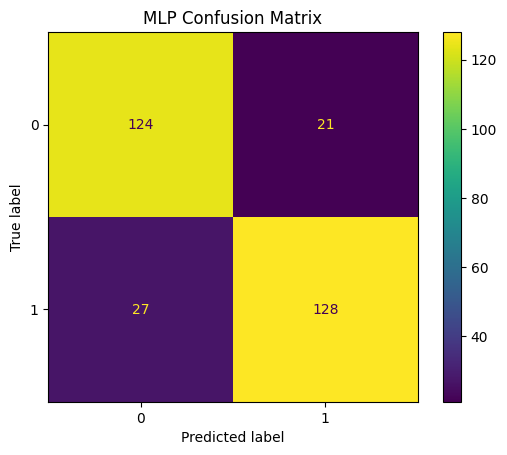

In [31]:
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('MLP Confusion Matrix')
plt.show()

In [32]:
y_probs= mlp.predict_proba(X_test)[:,1]

In [33]:
fpr, tpr, thresholds= roc_curve(y_test, y_probs)

In [35]:
auc= roc_auc_score(y_test, y_probs)
print("AUC: ", auc)

AUC:  0.9130589543937709


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


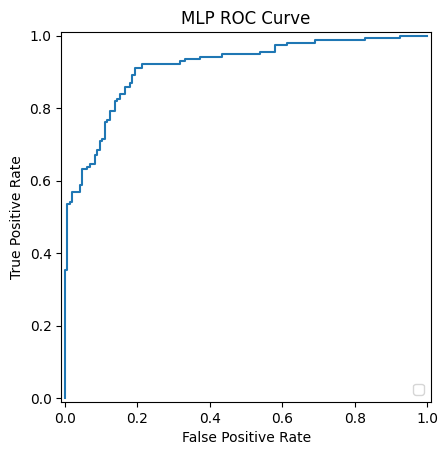

In [36]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('MLP ROC Curve')
plt.show()

In [37]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.84
Precision: 0.8590604026845637
Recall: 0.8258064516129032
F1 Score: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       145
           1       0.86      0.83      0.84       155

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

